### Point Pattern Analysis - nearest neighbor analysis

This notebook will demostrate the nearest neighbor statistic's sampling distribution, and how we can use Complete Spatial Randomness to conduct hypothesis testing.

We will be using a python package called `pointpats` which is a sub-module of Python Spatial Analysis Library (PySAL).


In [1]:
import pointpats
from pointpats import PoissonPointProcess, PoissonClusterPointProcess, Window, poly_from_bbox, PointPattern
import libpysal as ps
import matplotlib.pyplot as plt
import numpy as np

Consider this is our observed events and their loctaions.

In [2]:
observed = np.array([[66.22, 32.54], [22.52, 22.39], [31.01, 81.21],
          [9.47, 31.02],  [30.78, 60.10], [75.21, 58.93],
          [79.26,  7.68], [8.23, 39.93],  [98.73, 77.17],
          [89.78, 42.53], [65.19, 92.08], [54.46, 8.48]])

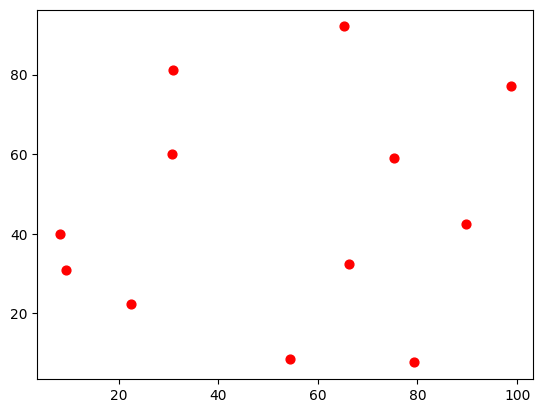

In [3]:
plt.scatter(observed[:,0],observed[:,1],s=40,color='red',)

In `pointpats`, you can easily calculate nearest neighor distance very easily. The below result is the same as we have on the slide. The first element an array of nearest neighors indices. Note that in python index starts with zero, so the index is off by one compared to the ones on the slide. The second element is an array of distance from each event to its nearest event.

In [4]:
pp = PointPattern(observed)
pp.knn()

(array([[ 9],
        [ 3],
        [ 4],
        [ 7],
        [ 2],
        [ 9],
        [11],
        [ 3],
        [ 5],
        [ 5],
        [ 5],
        [ 6]]),
 array([[25.59050019],
        [15.64542745],
        [21.11125292],
        [ 8.99587128],
        [21.11125292],
        [21.93729473],
        [24.81289987],
        [ 8.99587128],
        [29.76387072],
        [21.93729473],
        [34.63124168],
        [24.81289987]]))

And we can calculate the average nearest neighbor distance as:

In [5]:
observed_ann = pp.knn()[1].mean()
observed_ann

21.612139802089246

Then we try to simulate some random patterns as the baseline to comapre against. 

First we create a window

In [6]:
ext_square = [(0,0), (0,100), (100,100), (100, 0)]
window_square = Window(ext_square)

Then we generate random points following a Poisson Point Process.

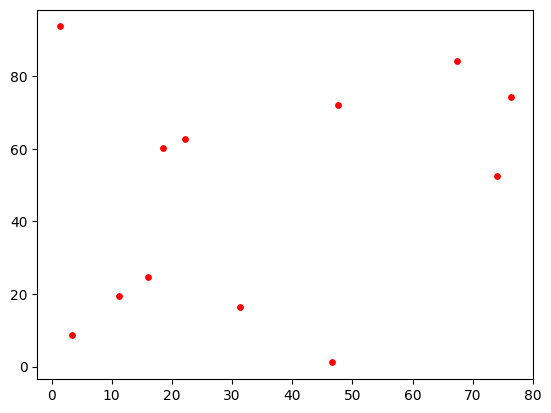

In [7]:
# n is the number of points
# sample is number of random patterns we generate, we just do 1 pattern.
samples = PoissonPointProcess(window_square, n=12, samples=1)

#get the coordinates from the PoissonPointProcess function.
pp_pcp = samples.realizations[0]
plt.scatter(pp_pcp[:,0],pp_pcp[:,1],s=15,color='red')

Calcualte ANND for each random pattern

In [8]:
pp = PointPattern(pp_pcp)
pp.knn()

(array([[10],
        [ 9],
        [ 1],
        [ 9],
        [ 3],
        [ 8],
        [ 7],
        [ 8],
        [ 7],
        [ 3],
        [ 0],
        [10]]),
 array([[ 4.52548312],
        [17.47341391],
        [21.56752219],
        [ 7.08639649],
        [13.33203672],
        [21.89570659],
        [23.26622995],
        [13.25507599],
        [13.25507599],
        [ 7.08639649],
        [ 4.52548312],
        [37.31803586]]))

In [9]:
pp.knn()[1].mean()

15.382238035740533

Next, remember what we talked about permutation test? We will generate random pattern which will serve as our null sampling distribution. Here, we just repeat the previous step 1,000 times.

In [10]:
ann_list = []
np.random
for i in range(1000):
    
    ann_list
    
    samples = PoissonPointProcess(window_square, 12, 1, conditioning=False, asPP=False)
    pp_pcp = samples.realizations[0]
    pp = PointPattern(pp_pcp)
    pp.knn()
    
    ann = pp.knn()[1].mean()
    print(ann)
    
    ann_list.append(pp.knn()[1].mean())


16.230175003588183
18.53680917950062
14.83365592062132
20.1766745103848
18.167359263115163
13.981955684461896
14.658113692334757
17.336639547529124
18.937239336805792
14.80442356365807
21.880982314288932
13.560789822804159
19.96045412443055
9.916948114966374
18.523920230445892
20.361715267044257
11.006465722911456
11.528628240311681
14.924088835564575
20.221391698602478
19.197766654216753
16.6346994782748
17.932975308385796
18.964898812101982
23.86742153049468
22.62587780437944
20.692825341517135
11.141494013804826
21.761893974309448
18.003953587298657
19.68917056487315
18.518116899712844
13.035963147419544
15.259258052954289
20.959780988528504
13.354789900750449
15.343007543725536
17.431027312175406
13.923337469572287
16.121128431039406
14.884651068689704
17.912960418005188
17.977420390987337
15.251141246603304
18.723992195166
14.089497174693713
20.64653078118953
12.484990194665473
15.33264320807754
14.489407693335535
17.308321728366213
21.061292373689696
17.002507471890848
16.4205777

21.155877763233693
15.544316530960787
13.24775852904214
17.96419372800645
23.636751877871546
20.899464190170097
16.197746900181635
14.651339425307029
19.057791155381768
16.5252948520145
16.750878469323325
16.244903861939072
22.1885589292463
14.030839625922106
16.00496362289125
21.88876120463964
17.966265676065415
17.285174121435812
14.67346863001827
20.792388830653433
12.94093302974167
18.163703463397052
22.524939078266694
16.93649051246473
18.995181655438845
18.824421207318665
16.005104333746427
15.015385138371157
16.356105592174515
19.299206343398964
17.192161236033012
13.789937676744117
15.2359631174156
19.138337711389255
13.91824627629135
14.784308526438787
19.150586271327544
13.186186097772856
16.410463916583975
21.18644442804023
19.454191690988022
14.422923790142931
14.605587249423484
17.623100619673178
17.33973962742018
23.090860894145404
14.144048072086939
18.033785195156444
15.060848871160012
18.883828718483503
20.44929910203019
15.876103329918337
15.337647032215585
14.5734456

Plot the sampling distribution of ANND under CSR assumption.

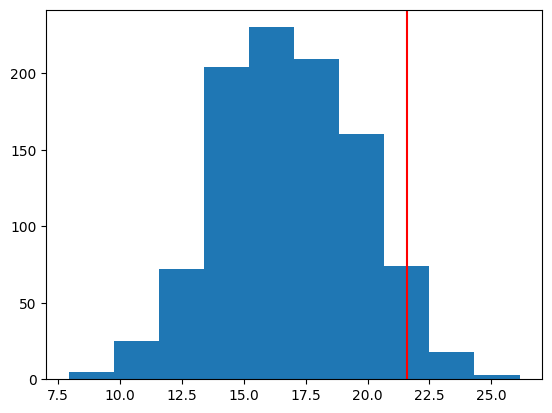

In [11]:
plt.hist(ann_list)
plt.axvline(observed_ann,color='red')

Out observed ANND = 21.6, which is at the vertical line position.

We can count how many times we get more extreme ANND values than observed ANND out of 1,000 random patterns.

In [12]:
p_sim = np.sum(ann_list >= observed_ann)/1000
p_sim

0.046

38 times, so we can get a p-value based on our permutation test which is 0.038. Then you can make your conclusion. Larger ANND indicates regular/dispersed, while smaller ANND indicates clusterd pattern.